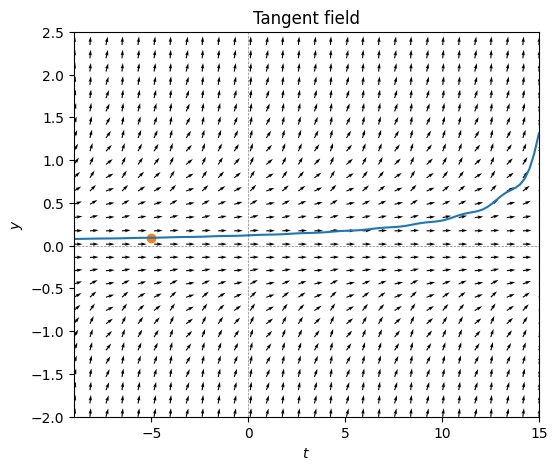

In [29]:
# Code to plot the tangent field of an ODE of the form
# y'(t) = F(t, y(t))

# Import libraries numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Set the range of t and y here
tmin = -9
tmax = 15
num_steps_t = 30
ymin = -2
ymax = 2.5
num_steps_y = 30
t = np.linspace( tmin, tmax, num_steps_t )
y = np.linspace( ymin, ymax, num_steps_y )


def F(t, y):
  # Put the F of the ODE here.
  # y**2 means y squared
  return y**2 * ( 2 + np.cos(3*t) )/5

# Define the vector components
dy = np.ones( y.shape + t.shape ) * F(t.reshape(1,-1), y.reshape(-1,1) )
dt = np.ones( y.shape + t.shape )

norms = np.linalg.norm( np.stack( (dy,dt) ), axis = 0 )

dy = dy/norms
dt = dt/norms

# Create the plot
plt.figure(figsize=(6, 5))
plt.title("Tangent field")
plt.xlim( tmin, tmax )
plt.ylim( ymin, ymax )
plt.xlabel('$t$')
plt.ylabel('$y$')

# Plot the vector field (arrows)
plt.quiver(t, y, dt, dy, angles='xy')

dense_ts = np.linspace( tmin, tmax, 100)
# If you have an explicit solution you can plot it like this
plt.plot( dense_ts, - 12/(-100 + 6*dense_ts + np.sin(3 *dense_ts)))

# You can plot a point (like an initial condition) with this function
plt.scatter( [-5], [- 12/(-100 + 6*(-5) + np.sin(3 *(-5) ) ) ], marker = 'o', color='C1'  )

# Include y and t axes
plt.axhline(0, color='black', linewidth=0.5, alpha=0.5, ls='--' )  # t=0 line
plt.axvline(0, color='black', linewidth=0.5, alpha=0.5, ls='--')  # y=0 line

#plt.savefig('test.png')
plt.show()